## Problem 1: An Example of FFT

The Fast Fourier Transform (FFT) is a widely utilized algorithm for computing the Discrete Fourier Transform (DFT) and its inverse, which is instrumental in various fields such as signal processing, image analysis, and data compression.

In Python, using the numpy and matplotlib libraries, create a set of times at equal time intervals dt (make dt different from unity). Then create “data” at these time values, for example a sinusoid with some amplitude (not unity), some frequency (not unity) a phase (not zero) and non-zero offset. [If you feel brave, expand to add a noise, and/or make a signal that contains a distribution of frequencies]. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

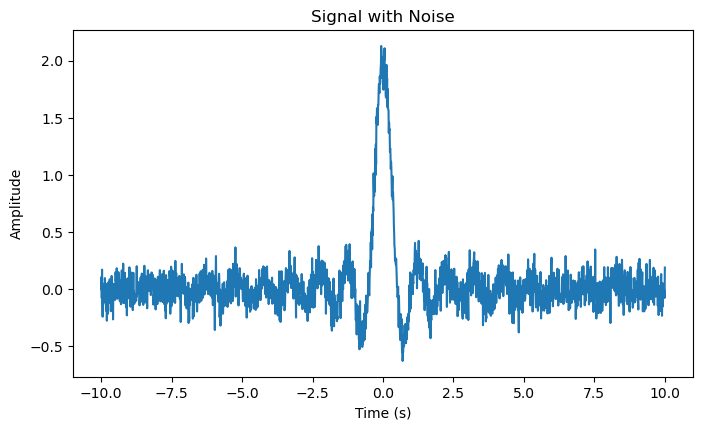

In [2]:
# Create a linearly spacing time array
t = np.linspace(-10,10,2000)
dt = t[1]-t[0]

# Define the signal
A = np.sin(2*np.pi*t)/(np.pi*t)

# Add noise
noise = np.random.normal(0,0.1,2000)
y = A + noise

# Plot the signal
plt.figure(figsize=(8,4.5))
plt.title('Signal with Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(t,y)
plt.show()

Practice FFT on this model data. What do you need to plot or evaluate in the FFT output to recover the amplitude, frequency, phase and offset? Change one at a time the dt and the total length of the data, and make sure you understand how the output of the FFT is affected. Make a nice plot (invaluable skill) of one of the power spectra, with clear values of frequency on the x axis, and correct units on the y axis.

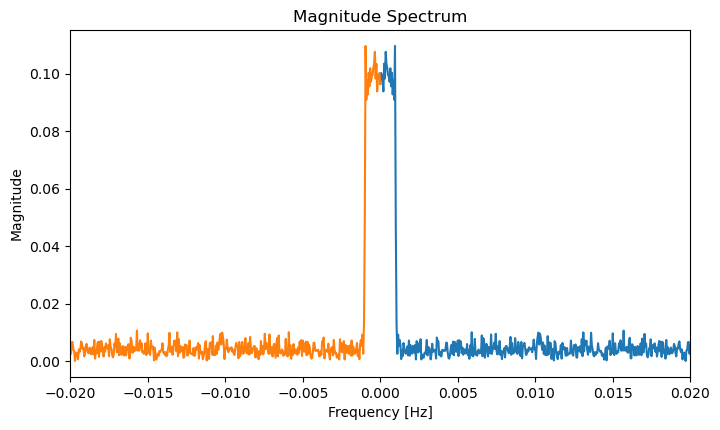

In [3]:
# Compute the FFT
fft_result = np.fft.fft(y)

N = len(y)
frequencies = np.fft.fftfreq(N, t[-1])
frequencies_negative = (-1) * frequencies

# Plot the magnitude spectrum
plt.figure(figsize=(8, 4.5))
plt.plot(frequencies[:N//2], np.abs(fft_result)[:N//2] * (1.0 / (N//2)))  # Normalization
plt.plot(frequencies_negative[:N//2], np.abs(fft_result)[:N//2] * (1.0 / (N//2)))  # Normalization
plt.title('Magnitude Spectrum')
plt.xlim(-0.02,0.02)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()

# Session 2

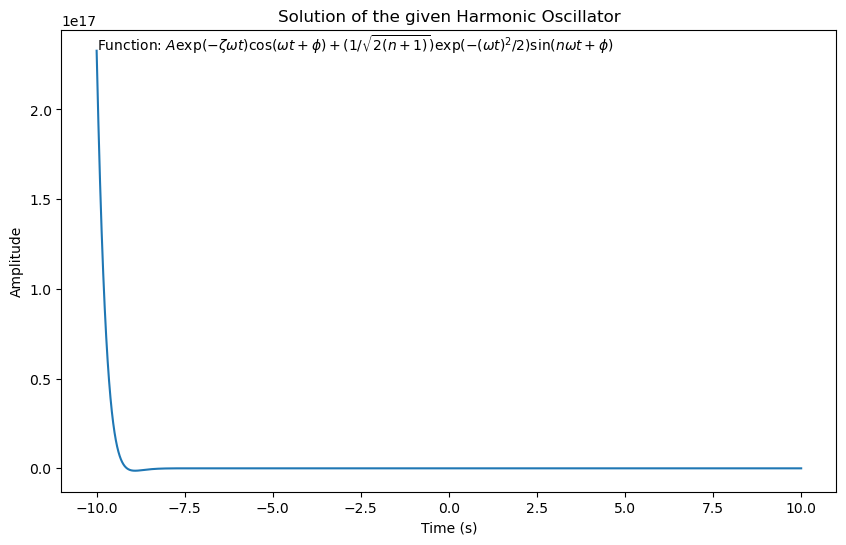

The program has ended. Thanks for using it.


In [21]:
# Session_2.py
# Ruize Li, rl737, Jesus College Cambridge

# This is a Python code for a Harmonic Oscillator Solver.

# This program can not only solve classical harmonic oscillation, 
# but also damped and even quantum harmonic oscillator.

# imorting necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the function to solve the harmonic oscillator equation
def harmonic_oscillator(A, w, phi, zeta, t, n):
    # The seond-order differential equation for the harmonic oscillator is:
    # y'' + 2*zeta*w*y' + w^2*y = 0
    # where y is the amplitude of the oscillator, w is the angular frequency,
    # zeta is the damping factor, and phi is the initial phase.
    # The driving force can be added by adding a term F*sin(w*t + phi) to the equation.
    # The quantum number n can be added by adding a term (1/sqrt(2*n+1))*sin(n*w*t + phi) to the equation.

    y = []
    # Here are all possible combinations of the input parameters:
    # Normal
    if zeta == 0 and n == 0:
        y = A*np.cos(w*t + phi)
        Function = f"$A\cos(\omega t + \phi)$"
    # Damped
    elif zeta!= 0 and n == 0:
        y = A*np.exp(-zeta*w*t)*np.cos(w*t + phi)
        Function = f"$A\exp(-\zeta\omega t) \cos(\omega t + \phi)$"
    # Quantum
    elif zeta == 0 and n!= 0:
        y = A*np.cos(w*t + phi) + (1/np.sqrt(2*n+1))*np.sin(n*w*t + phi)
        Function = f"$A\cos(\omega t + \phi) + (1/\sqrt{{2(n+1)}}) \sin(n \omega t + \phi)$"
    # Quantum and damped
    elif zeta!= 0 and n!= 0:
        y = A*np.exp(-zeta*w*t)*np.cos(w*t + phi) + (1/np.sqrt(2*n+1))*np.exp(-(w*t)**2/2)*np.sin(n*w*t + phi)
        Function = f"$A \exp(-\zeta \omega t) \cos(\omega t + \phi) + (1/\sqrt{{2(n+1)}}) \exp(-(\omega t)^2/2) \sin(n \omega t + \phi)$"
    else:
        print('Invalid input. Please check the input parameters.')
        quit()
    return y, t, A, Function

# Define the function that can ask for parameters
def ask_parameters():
    parameters = []
    names = ['Amplitude', 'Angular Frequency', 'Initial Phase', 'Damping Factor', 'Quantum Number', 'Start Time', 'End Time']
    # Ask the user for the amplitude, angular frequency, initial phase, and damping factor
    for i in range(len(names)):
        parameters.append(float(input(f"Enter the value of parameter {names[i]}: ")))
    A, w, phi, zeta, n, t_start, t_end = parameters
    t = np.linspace(t_start, t_end, int(abs(t_start-t_end))*1000+1)
    # Return the parameters
    return A, w, phi, zeta, t, n

# Define the function that can ask the user if they want to plot the solution
def ask_plot_harmonic_oscillator(y, t, A,Function):
    # Ask the user if they want to plot the solution
    plot_solution = input('Do you want to plot the solution? (y/n): ')

    # If the user wants to plot the solution, ask for time range and plot the solution
    if plot_solution == 'y':
        # Plot the solution
        plt.figure(figsize=(10, 6))
        plt.plot(t, y)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title('Solution of the given Harmonic Oscillator')
        plt.text(t[0], np.max(y), "Function: "+Function)
        plt.show()
    elif plot_solution == 'n':
        print('The solution is: '+Function)
        print('The solution will not be plotted.')
    else:
        print('The solution is: '+Function)
        print('Invalid input. The solution will not be plotted.')

# Start the program
A, w, phi, zeta, t, n = ask_parameters()

y, t, A, Function = harmonic_oscillator(A, w, phi, zeta, t, n)

ask_plot_harmonic_oscillator(y, t, A, Function)

# End of the program.
print('The program has ended. Thanks for using it.')